In [1]:
import matplotlib.pyplot as plt
import numpy as np
from polpymer.core_funcs import Dish, Monomer, Polymer
from polpymer.data_funcs import (
    error_observ,
    expect_observ,
    generate_N_polymers,
    grow_polymer,
    plot_dish,
    plot_polymer,
)
from scipy.optimize import curve_fit as cv

In [2]:
dim = (5, 5)
origin = (0, 0)
N = 5
L = 40

In [3]:
test3 = Dish(dim, origin)
test3.find_N_polymer(N, L)
test3.analyse_polymers(L)
print(test3.weights)
print(test3.end_to_end)

[[4.00000000e+00 1.20000000e+01 3.60000000e+01 1.08000000e+02
  3.24000000e+02 6.48000000e+02 1.94400000e+03 1.94400000e+03
  5.83200000e+03 1.16640000e+04 3.49920000e+04 1.04976000e+05
  3.14928000e+05 9.44784000e+05 2.83435200e+06 8.50305600e+06
  2.55091680e+07 7.65275040e+07 2.29582512e+08 4.59165024e+08
  1.37749507e+09 4.13248522e+09 1.23974556e+10 3.71923669e+10
  1.11577101e+11 3.34731302e+11 1.00419391e+12 3.01258172e+12
  9.03774517e+12 2.71132355e+13 8.13397065e+13 2.44019120e+14
  7.32057359e+14 2.19617208e+15 6.58851623e+15 1.97655487e+16
  5.92966460e+16 1.77889938e+17 1.77889938e+17 3.55779876e+17]
 [4.00000000e+00 1.20000000e+01 3.60000000e+01 7.20000000e+01
  2.16000000e+02 6.48000000e+02 1.29600000e+03 3.88800000e+03
  7.77600000e+03 2.33280000e+04 6.99840000e+04 2.09952000e+05
  6.29856000e+05 1.25971200e+06 3.77913600e+06 1.13374080e+07
  2.26748160e+07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.000

In [4]:
test4 = Dish(dim, origin)
test4.PERM(N, 2, L)
print(test4.weights)
print(test4.end_to_end)

[[4.00000000e+00 1.20000000e+01 3.60000000e+01 1.08000000e+02
  3.24000000e+02 9.72000000e+02 2.91600000e+03 8.74800000e+03
  2.62440000e+04 7.87320000e+04 2.36196000e+05 7.08588000e+05
  2.12576400e+06 6.37729200e+06 1.91318760e+07 2.86978140e+07
  8.60934420e+07 2.58280326e+08 7.74840978e+08 2.32452293e+09
  6.97356880e+09 2.09207064e+10 6.27621192e+10 1.88286358e+11
  3.76572715e+11 7.53145431e+11 1.50629086e+12 4.51887258e+12
  4.51887258e+12 1.35566178e+13 2.71132355e+13 5.42264710e+13
  1.08452942e+14 3.25358826e+14 6.50717652e+14 1.95215296e+15
  5.85645887e+15 1.75693766e+16 5.27081298e+16 1.58124389e+17]
 [4.00000000e+00 1.20000000e+01 3.60000000e+01 1.08000000e+02
  3.24000000e+02 9.72000000e+02 2.91600000e+03 8.74800000e+03
  2.62440000e+04 5.24880000e+04 1.04976000e+05 3.14928000e+05
  6.29856000e+05 1.25971200e+06 3.77913600e+06 7.55827200e+06
  1.51165440e+07 4.53496320e+07 1.36048896e+08 4.08146688e+08
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.000

Something is going wrong the end to end distance is shorter than the weight, they should be equal in size!!!

In [5]:
test4.weights.dtype

dtype('float64')

# Test Rosenbluth and PERM

In [2]:
dim = (5, 5)
origin = (0, 0)
N = 300
L = 60

## Rosenbluth method

In [4]:
from polpymer.core_funcs import Dish, Monomer, Polymer

polymers = Dish(dim, origin)
polymers.find_N_polymer(N, L)

a, b, c = polymers.analyse_polymers(L)
end_to_end = expect_observ(a, c)
error_end_to_end = error_observ(a, c, len(polymers.end_to_end))
gyration = expect_observ(b, c)
error_gyration = error_observ(b, c, len(polymers.gyration))
length = np.arange(1, len(end_to_end) + 1, 1, dtype=int)

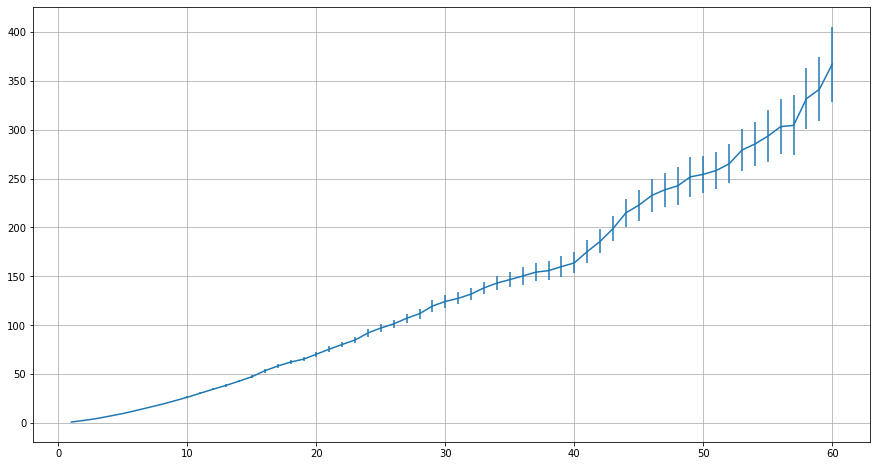

In [6]:
plt.figure(figsize=[15, 8])
plt.errorbar(length, end_to_end, error_end_to_end)  # , error_end_to_end)
plt.grid()
plt.show()

In [9]:
print(end_to_end)

[  1.           2.65131579   4.46052632   6.85918854   9.18628068
  12.13492977  15.17732774  18.49860348  21.88181759  25.76858676
  29.66644867  33.71105174  37.60161343  41.86611288  46.29593437
  50.32250532  55.64422567  60.24111222  65.88142779  71.77861324
  77.89356943  83.27394665  89.12100434  93.90002653  99.90849822
 107.3011184  114.73923365 125.15402118 132.93754948 140.7509227
 147.30378117 150.83643183 157.60355707 164.92049965 171.20231734
 180.29551004 191.04455345 200.38617253 209.67316295 229.25225319
 241.06915747 250.71421647 257.72163686 268.17518327 279.33261803
 276.65255982 282.70991142 287.95003879 295.36356148 293.3040662
 300.29093256 305.09383966 300.11483347 308.31179749 316.3533082
 318.20995401 322.19918627 326.54616337 330.3158445  339.93225505]


In [10]:
print(len(end_to_end))
print(len(polymers.end_to_end))

60
608


In [11]:
print(c[:, 49])

[0.00000000e+00 1.51799414e+19 5.53308864e+21 2.04929209e+20
 5.60225224e+22 0.00000000e+00 0.00000000e+00 4.85758124e+20
 9.33708707e+21 0.00000000e+00 1.09295578e+21 1.63943367e+21
 0.00000000e+00 8.40337837e+22 7.37745151e+21 1.24494494e+22
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.22181439e+20
 0.00000000e+00 0.00000000e+00 2.45915050e+21 7.28637187e+20
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.09295578e+21 3.68872576e+21 1.22957525e+21 0.00000000e+00
 0.00000000e+00 1.63943367e+21 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.46477890e+20 1.07946250e+20 3.27886734e+21
 3.73483483e+22 1.09295578e+21 3.07393813e+20 1.86741741e+22
 0.00000000e+00 2.66533950e+18 1.86741741e+22 6.30253377e+22
 5.53308864e+21 4.14981648e+21 3.73483483e+22 0.00000000e+00
 1.61919375e+20 1.22957525e+21 1.24494494e+22 0.00000000e+00
 1.24494494e+22 7.37745151e+21 0.00000000e+00 3.23838750e+20
 9.10796483e+19 5.53308864e+21 2.45915050e+21 5.46477890e+20
 4.04798437e+19 1.639433

## PERM

In [12]:
polymers = Dish(dim, origin)
polymers.PERM(N, 2, L)

end_to_end = expect_observ(polymers.end_to_end, polymers.weights)
error_end_to_end = error_observ(
    polymers.end_to_end, polymers.weights, len(polymers.end_to_end)
)
gyration = expect_observ(polymers.gyration, polymers.weights)
error_gyration = error_observ(
    polymers.gyration, polymers.weights, len(polymers.gyration)
)
length = np.arange(1, len(end_to_end) + 1, 1, dtype=int)

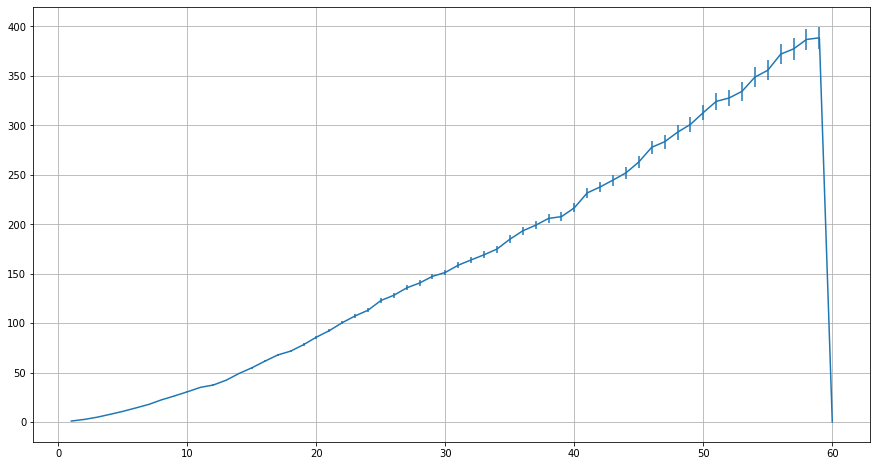

In [ ]:
plt.figure(figsize=[15, 8])
plt.errorbar(length, end_to_end, error_end_to_end)
plt.grid()
plt.show()

In [ ]:
q = np.array([0, 1, 2, -1])
print(q < 0)
if any(q < 0):
    print("bla")

[False False False  True]
bla


# Debugging
For some reason the weight calculated for the Rosenbluth methode is negative (this should be imposible)\
\
To identify the problem I printed the weights calculated by anayse_polymers and looked for a polymer which had a negative weight at one of its nodes, and then tried to figure out where the weight becomes negative.

In [ ]:
dim = (5, 5)
origin = (0, 0)
N = 300
L = 60

In [ ]:
polymers = Dish(dim, origin)
polymers.find_N_polymer(N, L)
polymers.analyse_polymers(L)

if any(polymers.weights[2] < 0):
    print("negative weights pressent")

negative weights pressent


In [ ]:
print(len(polymers.polymers))
print(polymers.weights)

649
[[ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ... -7.96666502e+18
  -5.45325098e+18  2.08699113e+18]
 [ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ... -7.47669219e+18
   3.49335969e+18 -7.96666502e+18]
 ...
 [ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ...  6.49674655e+18
   1.04349556e+18  3.13048669e+18]
 [ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ...  2.08699113e+18
   6.26097339e+18  3.36176082e+17]
 [ 4.00000000e+00  1.20000000e+01  3.60000000e+01 ...  5.52365191e+18
  -1.87578835e+18 -3.75157670e+18]]


In [ ]:
print(polymers.polymers[2].node_m_vals)

[4, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 1, 2, 2, 3, 3]


In [ ]:
Polymer.compute_node_weights(polymers.polymers[2])
print(polymers.polymers[2].node_weights)

[ 4.00000000e+00  1.20000000e+01  3.60000000e+01  1.08000000e+02
  2.16000000e+02  4.32000000e+02  1.29600000e+03  3.88800000e+03
  1.16640000e+04  3.49920000e+04  1.04976000e+05  3.14928000e+05
  3.14928000e+05  6.29856000e+05  1.25971200e+06  3.77913600e+06
  1.13374080e+07  2.26748160e+07  6.80244480e+07  1.36048896e+08
  4.08146688e+08  1.22444006e+09  3.67332019e+09  1.10199606e+10
  3.30598817e+10  9.91796452e+10  2.97538936e+11  8.92616807e+11
  2.67785042e+12  8.03355126e+12  2.41006538e+13  4.82013076e+13
  1.44603923e+14  4.33811768e+14  1.30143530e+15  3.90430591e+15
  1.17129177e+16  3.51387532e+16  1.05416260e+17  3.16248779e+17
  6.32497558e+17  1.89749267e+18  5.69247802e+18 -1.36931001e+18
 -2.73862003e+18 -2.73862003e+18 -8.21586008e+18  2.01502391e+18
  6.04507174e+18 -3.11528841e+17 -9.34586524e+17 -9.34586524e+17
 -1.86917305e+18 -3.73834610e+18 -3.73834610e+18 -3.73834610e+18
 -7.47669219e+18  3.49335969e+18 -7.96666502e+18 -5.45325098e+18]


## Something is going wrong between Dish.anlyse_polymers and Polymers.compute_node_weights

When the weights of the nodes is calculated by compute_node_weights some of the weights become negative, eventhough two positive numbers are multiplied. This happens only when the weights become very large.

In [ ]:
m = polymers.polymers[0].node_m_vals

w_ = np.array([])

for i in range(len(m)):
    w_ = np.append(w_, np.prod(np.array(m[0 : i + 1])))

print(m)
print(w_)
print("-----------------------------------")

v_ = np.array([])

for i in range(len(m)):
    if i == 0:
        v_ = np.append(v_, m[0])
    else:
        v_ = np.append(w_, w_[-1] * m[i])

print(v_)

[4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
[ 4.00000000e+00  1.20000000e+01  3.60000000e+01  1.08000000e+02
  2.16000000e+02  6.48000000e+02  1.94400000e+03  5.83200000e+03
  1.74960000e+04  5.24880000e+04  1.04976000e+05  3.14928000e+05
  9.44784000e+05  9.44784000e+05  2.83435200e+06  5.66870400e+06
  1.70061120e+07  5.10183360e+07  1.53055008e+08  4.59165024e+08
  1.37749507e+09  4.13248522e+09  1.23974556e+10  3.71923669e+10
  7.43847339e+10  7.43847339e+10  1.48769468e+11  1.48769468e+11
  2.97538936e+11  8.92616807e+11  2.67785042e+12  8.03355126e+12
  2.41006538e+13  7.23019613e+13  2.16905884e+14  6.50717652e+14
  1.30143530e+15  3.90430591e+15  1.17129177e+16  2.34258355e+16
  7.02775064e+16  1.40555013e+17  4.21665039e+17  8.43330077e+17
  1.68666015e+18  5.05998046e+18 -3.26680269e+18 -6.53360537e+18
  5.37953333e+18 -7.68767742e+18 -4.616

In [ ]:
print(w_[45], w_[46])
print(m[45], m[46])
print(w_[45] * m[46])

5.059980462358094e+18 -3.26680268663527e+18
3 3
1.5179941387074281e+19


## ?????????????????????????????????????
When performing the calculations in the for loop it gives a negative value, but when it is done outside the for loop it is positive
## ?????????????????????????????????????

In [ ]:
a, b, c = polymers.analyse_polymers(L)
end_to_end = expect_observ(a, c)
error_end_to_end = error_observ(a, c, len(polymers.end_to_end))
gyration = expect_observ(b, c)
error_gyration = error_observ(b, c, len(polymers.gyration))
length = np.arange(1, len(end_to_end) + 1, 1, dtype=int)

In [ ]:
print(np.log(abs(np.array([-1, 3, 5, 1, 7]))))

[0.         1.09861229 1.60943791 0.         1.94591015]


array([], dtype=float64)

# Plot scaling law

Dish.FRW does not store the location of the growing polymers!!

In [46]:
dim = (5, 5)
origin = (0, 0)
N = 1000
L = 50

test = Dish(dim, origin)

In [47]:
test.PERM(N, 2, L)

In [48]:
end_to_end = expect_observ(test.end_to_end, test.weights)
error_end_to_end = error_observ(test.end_to_end, test.weights, N)
gyration = expect_observ(test.gyration, test.weights)
error_gyration = error_observ(test.gyration, test.weights, N)
L = np.arange(1, L+1, 1)

In [49]:
def scale_law(x, a, b):
    """Random walk scaling law"""
    return a * x**(2 * b)

In [50]:
exp_value = np.array([0.771, 3/4])

#the fit must be prefomed for elements [1:]. [0] must be excluded as the error for the fist element is always
#zero, the end-to-end distance for a polymer with one monomer is always 1.
copt, ccov = cv(scale_law, L[1:], end_to_end[1:], p0=exp_value, sigma=error_end_to_end[1:], absolute_sigma=True)

print(copt)
print(ccov)

[1.01582542 0.72559935]
[[ 2.33966911e-05 -3.83903721e-06]
 [-3.83903721e-06  7.07785148e-07]]


In [51]:
fit_plot_val = scale_law(L, copt[0], copt[1])
v = 3/4
A = 0.771
expect_fit = scale_law(L, A, v)

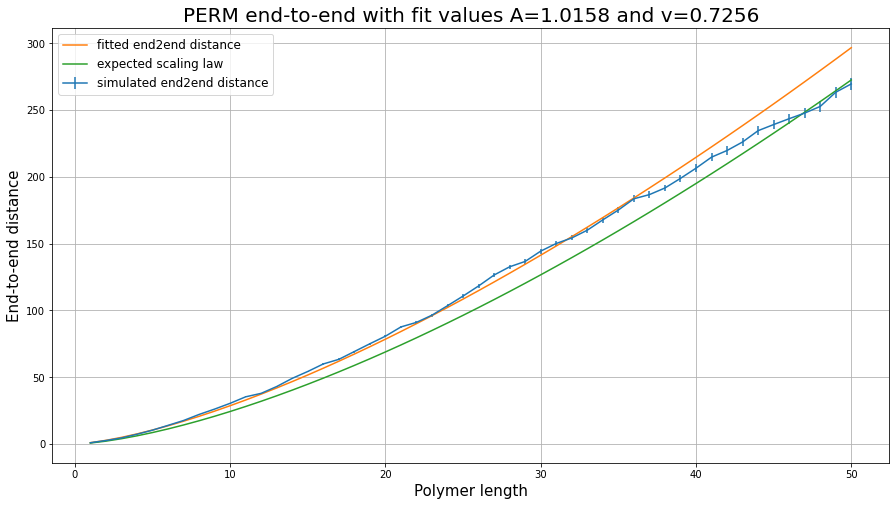

In [52]:
plt.figure(figsize=[15,8])
plt.errorbar(L, end_to_end, error_end_to_end, label='simulated end2end distance')
plt.plot(L, fit_plot_val, label='fitted end2end distance')
plt.plot(L, expect_fit, label='expected scaling law')
plt.title('PERM end-to-end with fit values A={} and v={}'.format(np.round(copt[0], decimals=4), 
                                                            np.round(copt[1], decimals=4)), fontsize=20)
plt.xlabel('Polymer length', fontsize=15)
plt.ylabel('End-to-end distance', fontsize=15)
plt.grid()
plt.legend(loc='best', fontsize='large')
plt.savefig("Figures/test1_fit_PERM_end2end.pdf")
plt.show()

In [53]:
print(len(test.polymers))

3333


In [2]:
def scale_law(x, a, b):
    """Random walk scaling law"""
    return a * x**(2 * b)


def fit_observ_error(observ, error_observ, scale_val=np.array([0.771, 3/4])):
    """Fit the observables with the scailing law using the error and plot the results
    
    Parameter
    ---------
    observ : nd.array
        The weighted averages of the observable for different polymer lengths
    error_observ : nd.array
        The error of the weighted averages of th observable for different polymer lengths
    scale_val: nd.array
        The expected values for the scaling factor according to literature. Must be an vector
        with two ellements ([a, b]), with the element relating to the scaling law as:
        <observ(L)> = a * L**(2 * b)
    
    Return
    ------
    length : nd.array
        The length of the polymer from 1 to L
    copt : nd.array
        The fitted values for scale_val with copt[0]=a and copt[1]=b
    ccov : nd.array
        The covariance of the fitted values
    expect_fit : nd.array
        The expected weighted average of the observable based on scale_val
    fit_plot_val: nd.array
        The fit of the weighted average of the observable based on copt
    """
    
    length = np.arange(1, len(observ)+1, 1)
    
    copt, ccov = cv(scale_law, length[1:], observ[1:], p0=scale_val,
                    sigma=error_observ[1:], absolute_sigma=True)
    
    expect_fit = scale_law(length, scale_val[0], scale_val[1])
    fit_plot_val = scale_law(length, copt[0], copt[1])
    
    plt.figure(figsize=[15,8])
    plt.errorbar(length, observ, error_observ, label='simulated observable')
    plt.plot(length, fit_plot_val, label='observable fit')
    plt.plot(length, expect_fit, label='expected scaling law')
    plt.title('Observable with fit values A={} and v={}'.format(np.round(copt[0], decimals=4), 
                                                            np.round(copt[1], decimals=4)), fontsize=20)
    plt.xlabel('Polymer length', fontsize=15)
    plt.ylabel('Observable value', fontsize=15)
    plt.grid()
    plt.legend(loc='best', fontsize='large')
    #plt.savefig("Figures/test1_fit_PERM_end2end.pdf")
    plt.show()
    
    return length, copt, ccov, expect_fit, fit_plot_val

def fit_observ(observ, scale_val=np.array([0.771, 3/4])):
    """Fit the observables with the scailing law and plot the results
    
    Parameter
    ---------
    observ : nd.array
        The weighted averages of the observable for different polymer lengths
    error_observ : nd.array
        The error of the weighted averages of th observable for different polymer lengths
    scale_val: nd.array
        The expected values for the scaling factor according to literature. Must be an vector
        with two ellements ([a, b]), with the element relating to the scaling law as:
        <observ(L)> = a * L**(2 * b)
    
    Return
    ------
    length : nd.array
        The length of the polymer from 1 to L
    copt : nd.array
        The fitted values for scale_val with copt[0]=a and copt[1]=b
    ccov : nd.array
        The covariance of the fitted values
    expect_fit : nd.array
        The expected weighted average of the observable based on scale_val
    fit_plot_val: nd.array
        The fit of the weighted average of the observable based on copt
    """
    
    length = np.arange(1, len(observ)+1, 1)
    
    copt, ccov = cv(scale_law, length[1:], observ[1:], p0=scale_val)
    
    expect_fit = scale_law(length, scale_val[0], scale_val[1])
    fit_plot_val = scale_law(length, copt[0], copt[1])
    
    plt.figure(figsize=[15,8])
    plt.plot(length, observ, label='simulated observable')
    plt.plot(length, fit_plot_val, label='observable fit')
    plt.plot(length, expect_fit, label='expected scaling law')
    plt.title('Observable with fit values A={} and v={}'.format(np.round(copt[0], decimals=4), 
                                                            np.round(copt[1], decimals=4)), fontsize=20)
    plt.xlabel('Polymer length', fontsize=15)
    plt.ylabel('Observable value', fontsize=15)
    plt.grid()
    plt.legend(loc='best', fontsize='large')
    #plt.savefig("Figures/test1_fit_PERM_end2end.pdf")
    plt.show()
    
    return length, copt, ccov, expect_fit, fit_plot_val

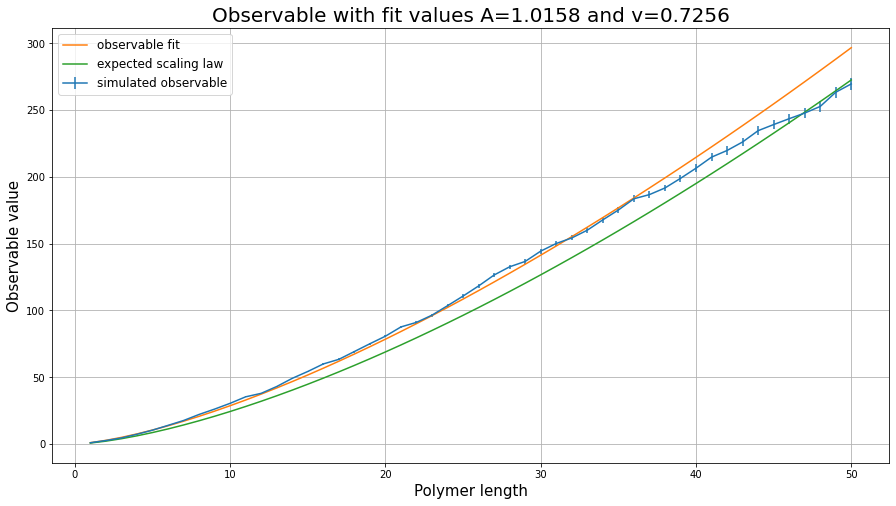

In [56]:
a, b, c, d, e = fit_observ_error(end_to_end, error_end_to_end)

$\textbf{A and v are identical for the function and the previous calculation the function works identically}$

In [4]:
dim = (5, 5)
origin = (0, 0)

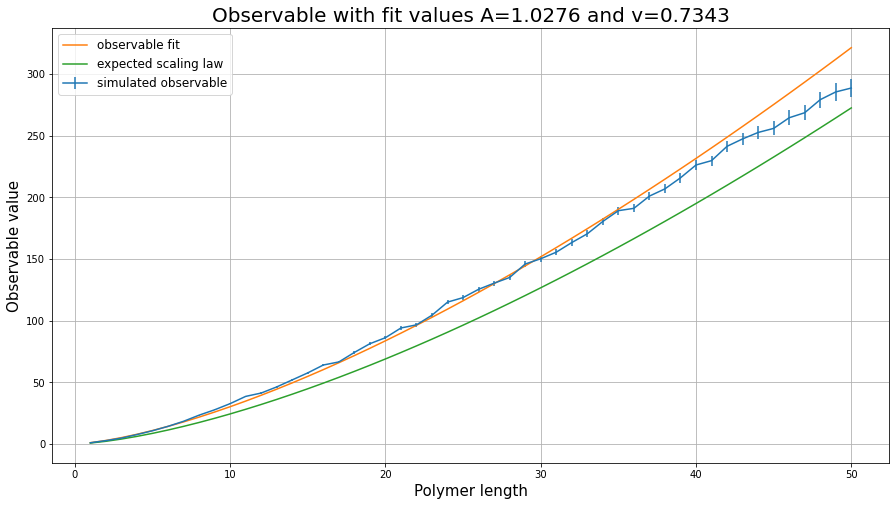

In [5]:
N = 500
L = 50
test2 = Dish(dim, origin)
test2.PERM(N, 2, L)
end_to_end = expect_observ(test2.end_to_end, test2.weights)
error_end_to_end = error_observ(test2.end_to_end, test2.weights, N)
gyration = expect_observ(test2.gyration, test2.weights)
error_gyration = error_observ(test2.gyration, test2.weights, N)
a, b, c, d, e = fit_observ_error(end_to_end, error_end_to_end)

In [6]:
print(len(test2.polymers))

1833


In [ ]:
N = 500
L = 70
test3 = Dish(dim, origin)
test3.PERM(N, 2, L)
end_to_end = expect_observ(test3.end_to_end, test3.weights)
error_end_to_end = error_observ(test3.end_to_end, test3.weights, N)
gyration = expect_observ(test3.gyration, test3.weights)
error_gyration = error_observ(test3.gyration, test3.weights, N)
print(len(test3.polymers))
a, b, c, d, e = fit_observ_error(end_to_end, error_end_to_end)

In [ ]:
a, b, c, d, e = fit_observ(gyration)

In [ ]:
print(gyration)

In [ ]:
plt.figure(figsize=[15,8])
plt.plot(a, gyration)
plt.plot(a, scale_law(a, b[0], b[1]))
plt.title('Radius of gyration with a={} and b={}'.format(np.round(b[0], decimals=3),
                                                         np.round(b[1], decimals=3)))
plt.grid()
plt.show()